# Dataset : IPL data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/perfect/Downloads/Python_projects/Python_projects/IPL_Data_analysis/IPL_Dataset.csv")

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
# Analyse the data and give the answers of below questions :
# 1. What is the total number of runs scored by each batting team?
df.groupby(by='batting_team')['total_runs'].sum()

batting_team
Chennai Super Kings            20899
Deccan Chargers                11463
Delhi Daredevils               21953
Gujarat Lions                   4862
Kings XI Punjab                23068
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          21965
Mumbai Indians                 24521
Pune Warriors                   6358
Rajasthan Royals               17703
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    23436
Sunrisers Hyderabad            11652
Name: total_runs, dtype: int64

In [7]:
# 2. How many wides have been bowled by each bowling team?
df.groupby(by='bowling_team')['wide_runs'].sum()

bowling_team
Chennai Super Kings            526
Deccan Chargers                328
Delhi Daredevils               614
Gujarat Lions                  107
Kings XI Punjab                668
Kochi Tuskers Kerala            56
Kolkata Knight Riders          658
Mumbai Indians                 786
Pune Warriors                  174
Rajasthan Royals               586
Rising Pune Supergiant          69
Rising Pune Supergiants         77
Royal Challengers Bangalore    725
Sunrisers Hyderabad            268
Name: wide_runs, dtype: int64

In [7]:
# 3. What is the average number of runs scored per inning by each team?
a = df.groupby(['batting_team','inning'])['total_runs'].sum()
a.groupby('batting_team').mean()

batting_team
Chennai Super Kings            6966.333333
Deccan Chargers                5731.500000
Delhi Daredevils               7317.666667
Gujarat Lions                  1620.666667
Kings XI Punjab                5767.000000
Kochi Tuskers Kerala            950.500000
Kolkata Knight Riders          7321.666667
Mumbai Indians                 8173.666667
Pune Warriors                  3179.000000
Rajasthan Royals               5901.000000
Rising Pune Supergiant         1235.000000
Rising Pune Supergiants        1031.500000
Royal Challengers Bangalore    5859.000000
Sunrisers Hyderabad            3884.000000
Name: total_runs, dtype: float64

In [8]:
# 4. Which batsman has scored the highest number of runs?
df.groupby('batsman')['batsman_runs'].sum().idxmax()

'SK Raina'

In [12]:
# 5. How many dismissals have occurred of each dismissal kind?
df.groupby(by='dismissal_kind')['player_dismissed'].count()

dismissal_kind
bowled                   1382
caught                   4373
caught and bowled         211
hit wicket                  9
lbw                       455
obstructing the field       1
retired hurt                9
run out                   755
stumped                   243
Name: player_dismissed, dtype: int64

In [10]:
# 6. What is the total runs scored by each over?
df.groupby(['match_id','over'])['total_runs'].sum()

match_id  over
1         1       18
          2       17
          3       22
          4       19
          5       14
                  ..
636       16      11
          17      19
          18      19
          19      28
          20      33
Name: total_runs, Length: 12582, dtype: int64

In [17]:
# 7. Which bowler has taken the most wickets?
wicket_dismissals = df[df['dismissal_kind'] != 'run out']

wickets_by_bowler = wicket_dismissals.groupby('bowler')['player_dismissed'].count()
most_wickets_bowler = wickets_by_bowler.idxmax()
most_wickets_count = wickets_by_bowler.max()
print(most_wickets_bowler,most_wickets_count)

SL Malinga 154


In [18]:
# 8. How many super overs have been played in total?
df['is_super_over'].sum()

81

In [15]:
# 9. What is the average number of extras (wide runs, bye runs, legbye runs, noball runs, penalty runs) conceded per inning by each bowling team?
df['total_extras'] = df['wide_runs'] + df['bye_runs'] + df['legbye_runs'] + df['noball_runs'] + df['penalty_runs']

# Group by bowling team and inning, then calculate the sum of extras per inning
extras_per_inning = df.groupby(['bowling_team', 'inning'])['total_extras'].sum()

# Calculate the average extras conceded per inning by each bowling team
average_extras_per_inning = extras_per_inning.groupby('bowling_team').mean()

print(average_extras_per_inning)

bowling_team
Chennai Super Kings            334.000000
Deccan Chargers                329.500000
Delhi Daredevils               395.666667
Gujarat Lions                   62.666667
Kings XI Punjab                307.500000
Kochi Tuskers Kerala            55.000000
Kolkata Knight Riders          401.333333
Mumbai Indians                 465.666667
Pune Warriors                  167.500000
Rajasthan Royals               352.666667
Rising Pune Supergiant          55.500000
Rising Pune Supergiants         54.000000
Royal Challengers Bangalore    327.250000
Sunrisers Hyderabad            162.333333
Name: total_extras, dtype: float64


In [14]:
# 10. How many runs have been scored by each batsman-bowler pair?
df.groupby(['batsman', 'bowler'])['batsman_runs'].sum()

batsman         bowler         
A Ashish Reddy  A Nehra             7
                AB Dinda            9
                AD Mathews         25
                AD Russell          4
                Anureet Singh       2
                                   ..
Z Khan          SR Watson           3
                Shakib Al Hasan     3
                Sohail Tanvir       3
                VRV Singh           0
                YK Pathan           1
Name: batsman_runs, Length: 17151, dtype: int64

In [13]:
# 11. What is the most common dismissal kind?
a=df['dismissal_kind'].value_counts()
b=a.idxmax()
c=a.max()
print(b,c)

caught 4373


In [12]:
# 12. How many matches have been played by each batting team?
df.groupby(by='batting_team')['match_id'].nunique()

batting_team
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   45
Rajasthan Royals               117
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
Name: match_id, dtype: int64

In [24]:
# 13. What is the average number of runs scored in each over?
df.groupby(by='over')['total_runs'].mean()

over
1     0.955635
2     1.121601
3     1.242057
4     1.291698
5     1.298832
6     1.321933
7     1.074869
8     1.149635
9     1.189325
10    1.170981
11    1.233177
12    1.269347
13    1.275509
14    1.313694
15    1.373206
16    1.418031
17    1.495300
18    1.561685
19    1.600031
20    1.707736
Name: total_runs, dtype: float64

In [9]:
# 14. Which fielder has been involved in the most dismissals?
a=df.groupby(by='fielder')['dismissal_kind'].count()
b=a.idxmax()
c=a.max()
print(b,c)

KD Karthik 127


In [12]:
# 15. How does the number of runs scored vary with the over number?
df.groupby('over')['total_runs'].sum()

over
1      7733
2      8993
3      9852
4     10207
5     10227
6     10397
7      8413
8      8966
9      9247
10     9047
11     9456
12     9694
13     9713
14     9900
15    10240
16    10397
17    10817
18    10899
19    10469
20     9647
Name: total_runs, dtype: int64

In [14]:
# 16. how is the relationship between the number of runs scored and the number of extras conceded?
df[['total_runs', 'extra_runs']].corr().iloc[0, 1]

0.0780851937510607

In [16]:
# 17. Are there any notable trends in the distribution of runs scored by batting teams across innings?


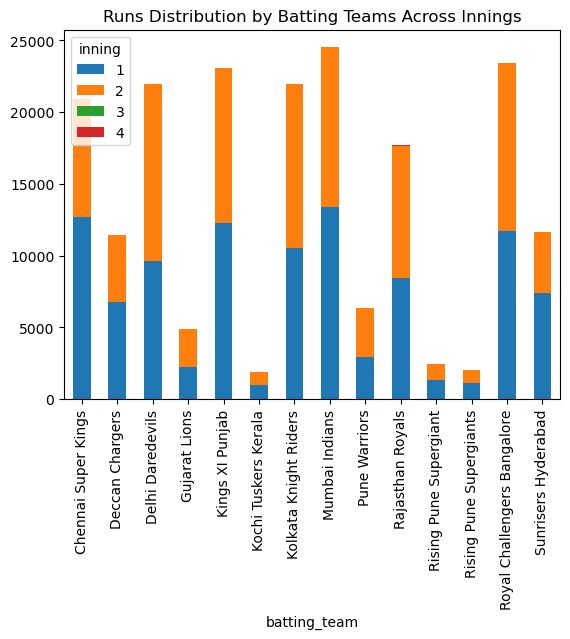

In [15]:
import matplotlib.pyplot as plt
runs_distribution_by_inning = df.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack()
runs_distribution_by_inning.plot(kind='bar', stacked=True, title='Runs Distribution by Batting Teams Across Innings')
plt.show()

In [24]:
df.groupby('inning')['total_runs'].describe()

,count,mean,std,min,25%,50%,75%,max
inning,,,,,,,,
1,78029.0,1.301401,1.586114,0.0,0.0,1.0,1.0,7.0
2,72350.0,1.279806,1.579167,0.0,0.0,1.0,1.0,7.0
3,43.0,2.232558,2.136276,0.0,1.0,1.0,4.0,6.0
4,38.0,2.026316,2.072821,0.0,1.0,1.0,4.0,6.0


In [26]:
# 18. Which batting team has the highest average runs per match?
a=df.groupby(by='batting_team')['total_runs'].mean()
b=a.idxmax()
c=a.max()
print(b,c)

Gujarat Lions 1.363432417274257


In [18]:
# 19. What is the total runs scored by each batsman?
df.groupby(by='batsman')['batsman_runs'].sum()

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64

In [19]:
# 20. How does the average number of runs scored per inning vary across different bowling teams?
a=df.groupby(['bowling_team','inning'])['total_runs'].sum()
a.groupby('bowling_team').mean()

bowling_team
Chennai Super Kings            6596.666667
Deccan Chargers                5809.000000
Delhi Daredevils               7447.666667
Gujarat Lions                  1696.666667
Kings XI Punjab                5817.500000
Kochi Tuskers Kerala            993.000000
Kolkata Knight Riders          7345.000000
Mumbai Indians                 7945.000000
Pune Warriors                  3428.500000
Rajasthan Royals               5951.333333
Rising Pune Supergiant         1218.000000
Rising Pune Supergiants        1056.500000
Royal Challengers Bangalore    5905.500000
Sunrisers Hyderabad            3821.666667
Name: total_runs, dtype: float64

In [20]:
# 21. how is the relationship between the number of wides and the number of no balls bowled?
df[['wide_runs', 'noball_runs']].corr().iloc[0, 1]

-0.008702741691253043

In [27]:
# 22. Which batting team has the highest number of centuries?
centuries_by_team = df[df['batsman_runs'] >= 100].groupby('batting_team')['batsman'].count()
team_highest_centuries = centuries_by_team.sort_values(ascending=False).head(1)
print("Batting team with the highest number of centuries:", team_highest_centuries)

Batting team with the highest number of centuries: Series([], Name: batsman, dtype: int64)


In [29]:
# 23. How does the number of wides vary with the over number?
df.groupby('over')['wide_runs'].sum()

over
1     481
2     442
3     359
4     295
5     279
6     307
7     330
8     261
9     255
10    227
11    182
12    220
13    241
14    224
15    248
16    254
17    264
18    271
19    264
20    238
Name: wide_runs, dtype: int64

In [30]:
# 24. What is the average number of runs scored per inning in matches with a super over?
df[df['is_super_over'] == 1].groupby(['match_id', 'inning'])['total_runs'].sum().mean()

12.357142857142858

In [31]:
# 25. How does the number of extras vary with the over number?
df.groupby('over')['extra_runs'].sum()

over
1     768
2     730
3     629
4     562
5     495
6     582
7     553
8     465
9     459
10    437
11    379
12    395
13    451
14    426
15    425
16    458
17    548
18    531
19    527
20    565
Name: extra_runs, dtype: int64

In [32]:
# 26. Which bowler has the highest economy rate?
total_runs_conceded_by_bowler = df.groupby('bowler')['total_runs'].sum()
total_overs_bowled_by_bowler = df.groupby('bowler')['over'].nunique()
economy_rate_by_bowler = total_runs_conceded_by_bowler / total_overs_bowled_by_bowler
highest_economy_bowler = economy_rate_by_bowler.sort_values(ascending=False).head(1)
highest_economy_bowler

bowler
PP Chawla    174.473684
dtype: float64

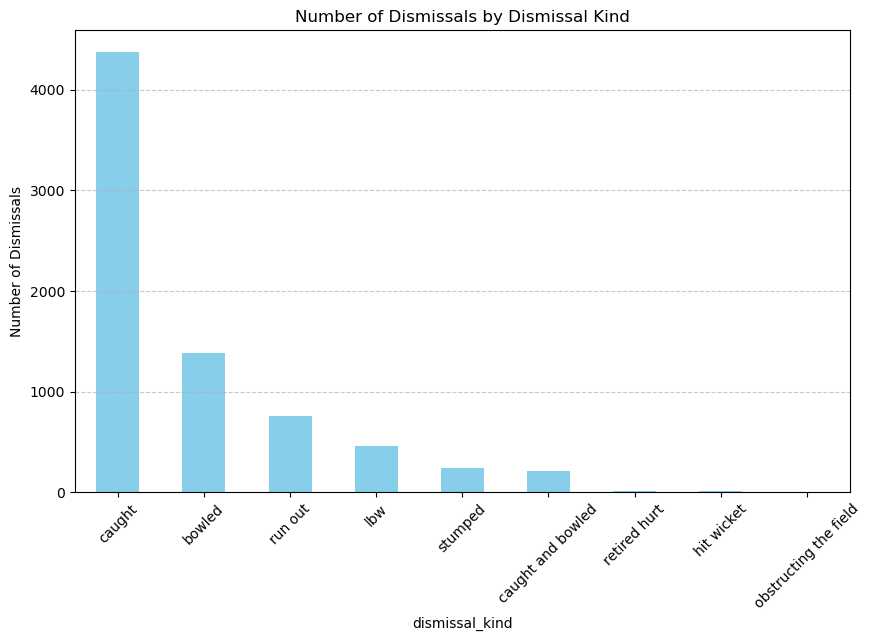

In [38]:
# 27. How does the number of dismissals vary across different dismissal kinds?
dismissal_counts = df['dismissal_kind'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='bar', color='skyblue')
plt.xlabel('dismissal_kind')
plt.ylabel('Number of Dismissals')
plt.title('Number of Dismissals by Dismissal Kind')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
df['dismissal_kind'].value_counts()

dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64

In [37]:
# 28. What is the distribution of runs scored by each batting team in super overs?
runs_super_over_by_team = df[df['is_super_over'] == 1].groupby('batting_team')['total_runs'].sum()
print("Distribution of runs scored by each batting team in super overs:\n", runs_super_over_by_team)

Distribution of runs scored by each batting team in super overs:
 batting_team
Chennai Super Kings             9
Delhi Daredevils               11
Gujarat Lions                   6
Kings XI Punjab                25
Kolkata Knight Riders          26
Mumbai Indians                 11
Rajasthan Royals               35
Royal Challengers Bangalore    30
Sunrisers Hyderabad            20
Name: total_runs, dtype: int64
